### BFS - Breadth-first search

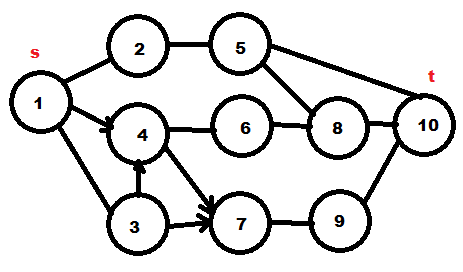


In [31]:
from collections import defaultdict, deque
import sys


graph = {1: [2,4,3], 2:[5], 3:[4,7], 4:[6,7], 5:[8,10], 6:[8], 7:[9], 8:[10], 9:[10], 10:[]}

# White - unprocessed, not yet discovered
# Yellow - "active frontier" (nodes under processing)
# Red - processed

def BFS(s,t):
    visited = {} # посещалась вершина или нет (false, true)
    d = {}
    for v in graph.keys():
        visited[v] = False # start is White
        d[v] = sys.maxsize
    queue = deque([s]) # кладем стартовую ноду на обработку. Потомки будут добавляться в эту очередь
    visited[s] = True
    d[s] = 0
    while len(queue) != 0:
        u = queue.pop() #  [_ _ _ _ _ _] -> _
        for successor in graph[u]: # все преемники текущего узла, ...
            if not visited[successor]: # которые еще не были посещены ..
                queue.appendleft(successor) # добавить в очередь ... # _ -> [_ _ _ _ _ _] 
                visited[successor] = True # и пометить как посещенные
                d[successor] = d[u] + 1 # подсчет ребер до текущей ноды       
    
    print(d)

BFS(1, 10)

{1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 3, 9: 3, 10: 3}


## Dijkstra


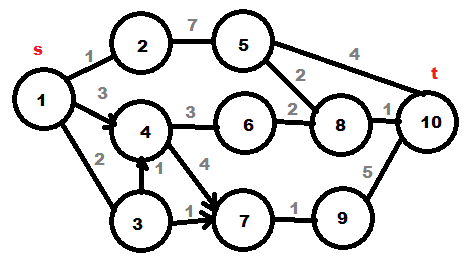

In [10]:
from collections import defaultdict, deque
import sys

# deque - double-ended queue, DEQUE)
# adjacency list - пара (преемник, вес)
input = """1,2,1
            1,4,3
            1,3,2
            2,5,7
            3,4,1
            3,7,1
            4,6,3
            4,7,4
            5,8,2
            5,10,4
            6,8,2
            7,9,1
            8,10,1
            9,10,5"""

def dijkstra(edges, s):
    distances, done, visited = {}, set(), set()
    q = deque()
    current = s
    visited.add(current)
    distances[s] = 0
    while True:
        next_edges = edges.get(current, {}) # преемники текущей ноды
        # сортирую от меньшего веса ребра до большего
        for node, w in sorted(next_edges.items(), key=lambda x: x[1]):
            if node in done: continue # если нода уже была
            if not node in visited:
                q.append(node) # добавляю в очередь преемников текущей ноды (в которых еще не был)
                visited.add(node) # и я их как бы оценил, но не прошел (yellow)
            new_val = distances[current] + w
            cur_val = distances.get(node, None)
            if cur_val is None or cur_val > new_val: # relaxing
                distances[node] = new_val
        done.add(current) # релаксировал эту ноду
        try: current = q.popleft()
        except: break
    return distances
        
    
edges = {}
for row in input.split():
    a, b, w = map(int, row.split(','))
    if not a in edges: edges[a] = {}
    ex = edges[a].get(b, None)
    if ex is not None and ex <= w: continue
    edges[a][b] = w
print(edges, 0)
d = dijkstra(edges, 1)
print(d)

{1: {2: 1, 4: 3, 3: 2}, 2: {5: 7}, 3: {4: 1, 7: 1}, 4: {6: 3, 7: 4}, 5: {8: 2, 10: 4}, 6: {8: 2}, 7: {9: 1}, 8: {10: 1}, 9: {10: 5}} 0
{1: 0, 2: 1, 3: 2, 4: 3, 5: 8, 7: 3, 6: 6, 8: 8, 10: 9, 9: 4}


In [7]:
next_edges = edges.get(1, {})
sorted(next_edges.items(), key=lambda x: x[1])

[(2, 1), (3, 2), (4, 3)]

In [11]:
# Python program to find single source shortest paths 
# for Directed Acyclic Graphs Complexity :OV(V+E) 
from collections import defaultdict 

# Graph is represented using adjacency list. Every 
# node of adjacency list contains vertex number of 
# the vertex to which edge connects. It also contains 
# weight of the edge 
class Graph: 
	def __init__(self,vertices): 

		self.V = vertices # No. of vertices 

		# dictionary containing adjacency List 
		self.graph = defaultdict(list) 

	# function to add an edge to graph 
	def addEdge(self,u,v,w): 
		self.graph[u].append((v,w)) 


	# A recursive function used by shortestPath 
	def topologicalSortUtil(self,v,visited,stack): 

		# Mark the current node as visited. 
		visited[v] = True

		# Recur for all the vertices adjacent to this vertex 
		if v in self.graph.keys(): 
			for node,weight in self.graph[v]: 
				if visited[node] == False: 
					self.topologicalSortUtil(node,visited,stack) 

		# Push current vertex to stack which stores topological sort 
		stack.append(v) 


	''' The function to find shortest paths from given vertex. 
		It uses recursive topologicalSortUtil() to get topological 
		sorting of given graph.'''
	def shortestPath(self, s): 

		# Mark all the vertices as not visited 
		visited = [False]*self.V 
		stack =[] 

		# Call the recursive helper function to store Topological 
		# Sort starting from source vertice 
		for i in range(self.V): 
			if visited[i] == False: 
				self.topologicalSortUtil(s,visited,stack) 

		# Initialize distances to all vertices as infinite and 
		# distance to source as 0 
		dist = [float("Inf")] * (self.V) 
		dist[s] = 0

		# Process vertices in topological order 
		while stack: 

			# Get the next vertex from topological order 
			i = stack.pop() 

			# Update distances of all adjacent vertices 
			for node,weight in self.graph[i]: 
				if dist[node] > dist[i] + weight: 
					dist[node] = dist[i] + weight 

		# Print the calculated shortest distances 
		for i in range(self.V): 
			print ("%d" %dist[i]) if dist[i] != float("Inf") else "Inf" , 


g = Graph(6) 
g.addEdge(0, 1, 5) 
g.addEdge(0, 2, 3) 
g.addEdge(1, 3, 6) 
g.addEdge(1, 2, 2) 
g.addEdge(2, 4, 4) 
g.addEdge(2, 5, 2) 
g.addEdge(2, 3, 7) 
g.addEdge(3, 4, -1) 
g.addEdge(4, 5, -2) 

# source = 1 
s = 1

print ("Following are shortest distances from source %d " % s) 
g.shortestPath(s) 

# This code is contributed by Neelam Yadav 


Following are shortest distances from source 1 
0
2
6
5
3


### Transitive closure

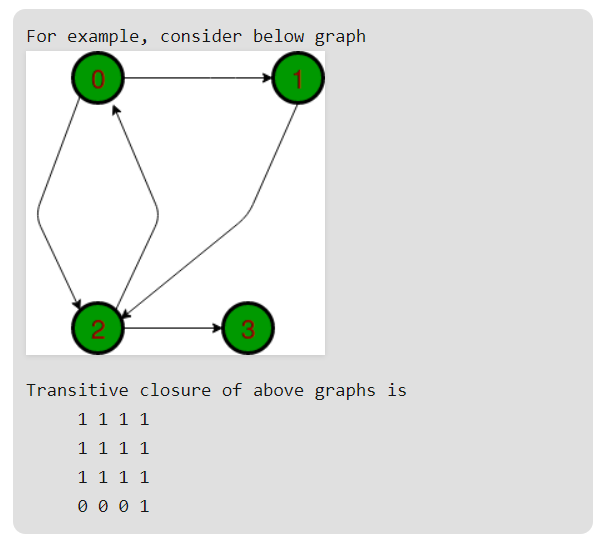

In [27]:
from collections import defaultdict  
#Class to represent a graph 
class Graph: 
    def __init__(self, vertices): 
        self.V = vertices 
    # A utility function to print the solution 
    def printSolution(self, reach): 
        print ("Following matrix transitive closure of the given graph ")    
        for i in range(self.V):
            print(reach[i])
    # Prints transitive closure of graph[][] using Floyd Warshall algorithm 
    def transitiveClosure(self, graph): 
        reach = graph
        for k in range(self.V):     
            # Pick all vertices as source one by one 
            for i in range(self.V): 
                # Pick all vertices as destination for the 
                # above picked source 
                for j in range(self.V): 
                    # If vertex k is on a path from i to j,  
                       # then make sure that the value of reach[i][j] is 1 
                    reach[i][j] = reach[i][j] or (reach[i][k] and reach[k][j]) 
        self.printSolution(reach)       
g= Graph(4) 
graph = [[0, 0, 0, 0], 
         [0, 0, 1, 0], 
         [0, 1, 0, 1], 
         [1, 1, 0, 0]] 
g.transitiveClosure(graph)

Following matrix transitive closure of the given graph 
[0, 0, 0, 0]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]


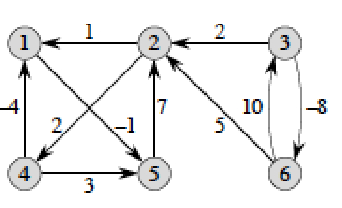

In [14]:
from collections import defaultdict  
import copy
#Class to represent a graph 
class Graph: 
    def __init__(self, vertices): 
        self.V = vertices 
    # A utility function to print the solution 
    def printSolution(self, reach): 
        print ("Following matrix transitive closure of the given graph ")    
        for i in range(self.V):
            print(reach[i])
    # Prints transitive closure of graph[][] using Floyd Warshall algorithm 
    def transitiveClosure(self, graph): 
        reach = copy.deepcopy(graph)
        for k in range(self.V):     
            # Pick all vertices as source one by one 
            for i in range(self.V): 
                # Pick all vertices as destination for the 
                # above picked source 
                for j in range(self.V): 
                    reach[i][j] = min(reach[i][j], reach[i][k] + reach[k][j])
        self.printSolution(reach)       
g= Graph(6) 
graph =  [[0, 0, 0, 0, -1, 0],  #1
          [1, 0, 0, 2, 0, 0],   #2
          [0, 0, 0, 0, 0, -8],   #3
          [-4, 0, 0, 0, 3, 0],   #4
          [0, 7, 0, 0, 0, 0],   #5
          [0, 5, 10, 0, 0, 0]]   #6
g.transitiveClosure(graph)

Following matrix transitive closure of the given graph 
[-108, -108, -108, -108, -121, -191]
[-108, -108, -108, -108, -121, -191]
[-108, -108, -108, -108, -121, -191]
[-112, -112, -112, -112, -125, -195]
[-120, -120, -120, -120, -133, -203]
[-183, -183, -183, -183, -196, -266]


In [20]:
# Python program to find  
# maximal Bipartite matching. 
class GFG: 
    def __init__(self,graph):        
        # residual graph 
        self.graph = graph  
        self.ppl = len(graph) 
        self.jobs = len(graph[0])   
    # A DFS based recursive function 
    def bpm(self, u, matchR, seen): 
        for v in range(self.jobs): 
            if self.graph[u][v] and seen[v] == False: 
                seen[v] = True 
                if matchR[v] == -1 or self.bpm(matchR[v],  
                                               matchR, seen): 
                    matchR[v] = u 
                    return True
        return False
    def maxBPM(self): 
        '''An array to keep track'''
        matchR = [-1] * self.jobs 
        # Count of jobs assigned to applicants 
        result = 0 
        for i in range(self.ppl): 
            # Mark all jobs as not seen for next applicant. 
            seen = [False] * self.jobs        
            # Find if the applicant 'u' can get a job 
            if self.bpm(i, matchR, seen): 
                result += 1
        return result 
bpGraph =[[0, 1, 1, 0, 0, 0], 
          [1, 0, 0, 1, 0, 0], 
          [0, 0, 1, 0, 0, 0], 
          [0, 0, 1, 1, 0, 0], 
          [0, 0, 0, 0, 0, 0], 
          [0, 0, 0, 0, 0, 1]] 
g = GFG(bpGraph) 
print ("Maximum number of applicants that can get job is %d " % g.maxBPM()) 

Maximum number of applicants that can get job is 5 
